Por favor, sube el archivo .xlsx para AMD (1 min, 10-11 Mar 2025):


Saving AMD 1 MIN.xlsx to AMD 1 MIN.xlsx
Por favor, sube el archivo .xlsx para INTC (1 min, 10-11 Mar 2025):


Saving INTC 1 MIN.xlsx to INTC 1 MIN.xlsx
Por favor, sube el archivo .xlsx para TSLA (1 min, 10-11 Mar 2025):


Saving TSLA 1 MIN.xlsx to TSLA 1 MIN.xlsx
                       AMD     INTC      TSLA
2025-03-10 02:01:00  95.54  19.7599  215.2800
2025-03-10 02:02:00  95.70  19.7598  215.5494
2025-03-10 02:03:00  95.68  19.7501  215.5000
2025-03-10 02:04:00  95.70  19.7600  215.8999
2025-03-10 02:05:00  95.79  19.7503  215.9796


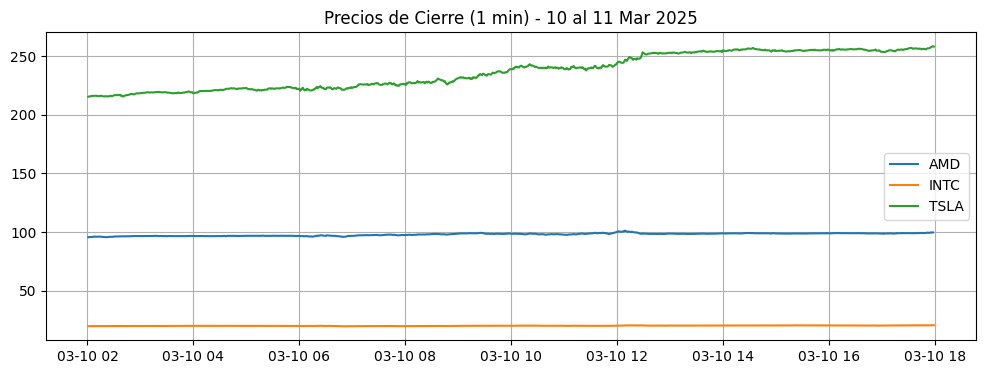

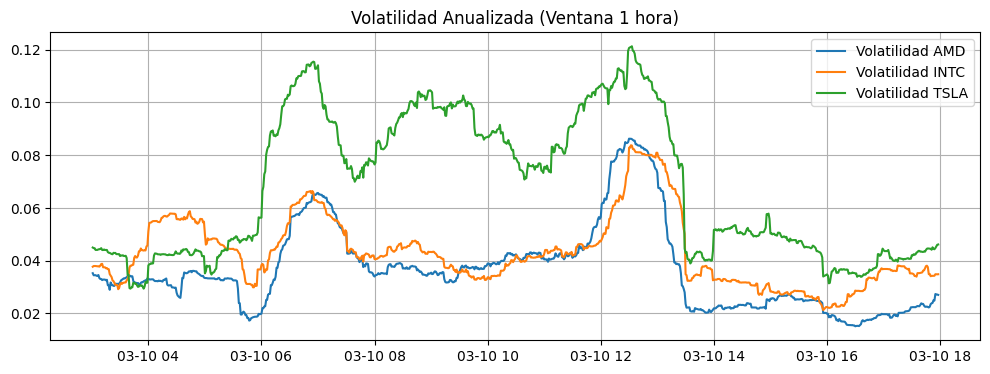

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


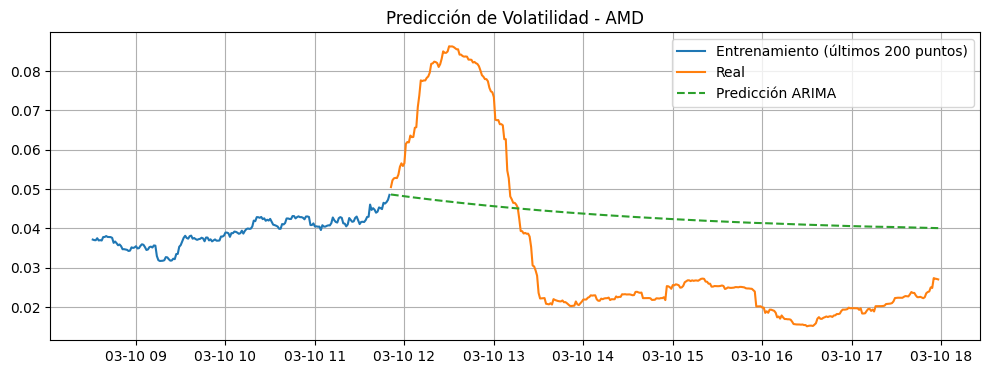

MSE para AMD: 0.000500


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)


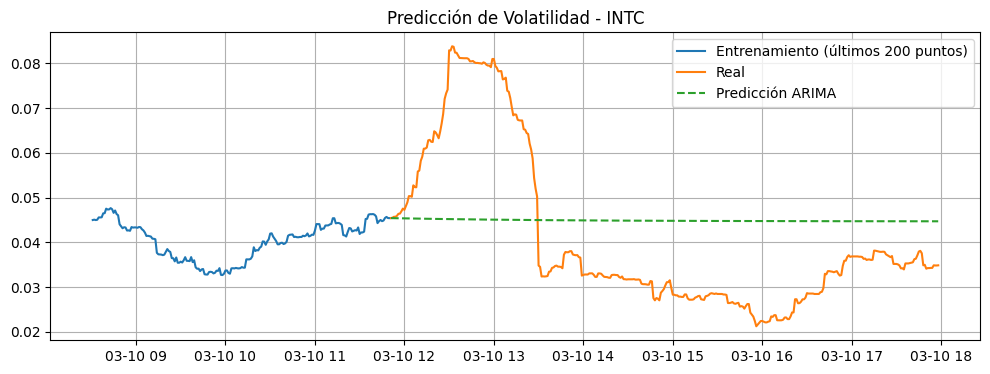

MSE para INTC: 0.000339


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)


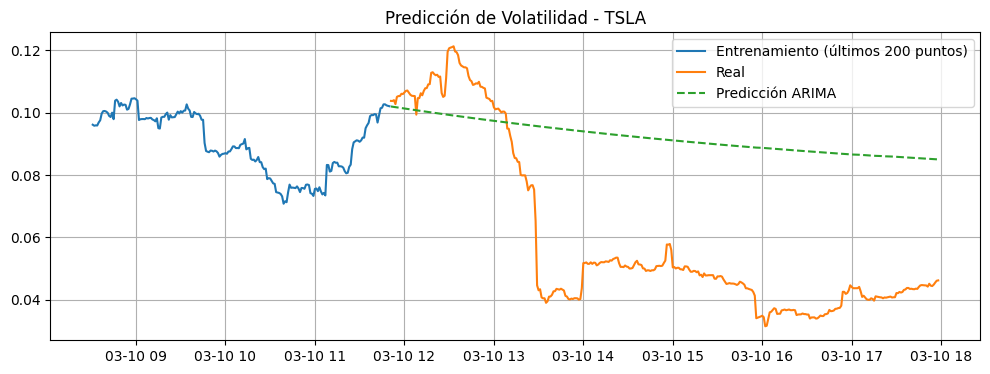

MSE para TSLA: 0.001578


In [1]:
# Script simplificado para análisis de volatilidades de acciones en Colab
# Datos: AMD, INTC, TSLA - 1 min del 10 al 11 de marzo de 2025

# 1. Configuración inicial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files

np.random.seed(0)

# 2. Carga de datos desde archivos .xlsx para cada acción
stocks = {'AMD': None, 'INTC': None, 'TSLA': None}

for stock in stocks.keys():
    print(f"Por favor, sube el archivo .xlsx para {stock} (1 min, 10-11 Mar 2025):")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    # Leer el archivo Excel y buscar la sección de historia
    df = pd.read_excel(file_name, header=None)
    start_idx = df[df[0] == 'Close'].index[0] + 1  # Fila siguiente a "Close"
    data = pd.read_excel(file_name, skiprows=start_idx, names=['Close'], usecols=[0])

    # Crear índice de tiempo desde 2025-03-10 02:01 con intervalos de 1 minuto
    start_time = pd.to_datetime('2025-03-10 02:01:00')
    time_index = pd.date_range(start=start_time, periods=len(data), freq='1min')
    data.index = time_index

    # Filtrar datos del 10 al 11 de marzo de 2025
    start_date = '2025-03-10 00:00:00'
    end_date = '2025-03-11 23:59:00'
    data = data.loc[start_date:end_date]

    stocks[stock] = data['Close']

# Convierte el diccionario en un DataFrame
all_data = pd.DataFrame(stocks)

# Muestra las primeras filas
print(all_data.head())

# Grafica las series temporales de precios
plt.figure(figsize=(12, 4))
for col in all_data.columns:
    plt.plot(all_data[col], label=col)
plt.title('Precios de Cierre (1 min) - 10 al 11 Mar 2025')
plt.grid()
plt.legend()
plt.show()

# 3. Calcular y graficar volatilidad (retornos logarítmicos)
returns = np.log(all_data / all_data.shift(1)).dropna()
volatility = returns.rolling(window=60).std() * np.sqrt(1440)  # Volatilidad anualizada (1440 min/día)

plt.figure(figsize=(12, 4))
for col in volatility.columns:
    plt.plot(volatility[col], label=f'Volatilidad {col}')
plt.title('Volatilidad Anualizada (Ventana 1 hora)')
plt.grid()
plt.legend()
plt.show()

# 4. Ajuste de modelo ARIMA simple y predicción
for stock in stocks.keys():
    # Dividir en entrenamiento y prueba (últimas 6 horas = 360 puntos)
    train = volatility[stock].dropna()[:-360]
    test = volatility[stock].dropna()[-360:]

    # Ajustar modelo ARIMA(1,0,1)
    model = ARIMA(train, order=(1, 0, 1))
    fit_model = model.fit()

    # Predecir las próximas 6 horas
    forecast = fit_model.forecast(steps=360)

    # Graficar predicción
    plt.figure(figsize=(12, 4))
    plt.plot(train.index[-200:], train[-200:], label='Entrenamiento (últimos 200 puntos)')
    plt.plot(test.index, test, label='Real')
    plt.plot(test.index, forecast, label='Predicción ARIMA', linestyle='--')
    plt.title(f'Predicción de Volatilidad - {stock}')
    plt.grid()
    plt.legend()
    plt.show()

    # Calcular error cuadrático medio
    mse_value = np.mean((test - forecast) ** 2)
    print(f"MSE para {stock}: {mse_value:.6f}")

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")